In [ ]:
import numpy as np
import pandas as pd 
import cv2
import os 
import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# prepping df_0 df_1

In [ ]:
!unrar x "/content/drive/MyDrive/PFE_2/Data_challenge.rar"

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Extracting  Data_challenge/x_train/2/AE00227_230816_00_2_3_2001.jpg       57%  OK 
Extracting  Data_challenge/x_train/2/AE00227_230901_00_2_1_2001.jpg       57%  OK 
Extracting  Data_challenge/x_train/2/AE00227_230901_00_3_2_2001.jpg       57%  OK 
Extracting  Data_challenge/x_train/2/AE00227_231328_00_2_1_2001.jpg       57%  OK 
Extracting  Data_challenge/x_train/2/AE00227_231328_00_2_2_2001.jpg       57%  OK 
Extracting  Data_challenge/x_train/2/AE00227_231328_00_2_3_2001.jpg       57%  OK 
Extracting  Data_challenge/x_train/2/AE00227_231328_00_2_4_2001.jpg       57%  OK 
Extracting  Data_challenge/x_train/2/AE00227_231328_00_3_1_2001.jpg       57%  OK 
Extracting  Data_challenge/x_train/2/AE00227_231328_00_3_2_2001.jpg       57%  OK 
Extracting  Data_challenge/x_train/2/AE00227_231328_00_3_3_2001.jpg       57%  OK 
Ex

In [ ]:
path = "/content/Data_challenge"
train_file = os.path.join(path,"x_train")
test_file = os.path.join(path, "x_test")

In [ ]:
def generate_class_dataset(path_file,file):     
    classe = os.path.join(path_file,file)
    images = []
    dies_imls = []
    noms = []
    dies = []
    #classes = [] 
    dataset = []
    i=0
    print("classe:",file)
    for nom_img in os.listdir(classe):
                img = os.path.join(classe,nom_img)
                image = cv2.imread(img,cv2.IMREAD_GRAYSCALE)/255
                image = cv2.resize(image,(124,124))
                die_iml = nom_img[18],nom_img[20]
                die = nom_img[18]
                images.append(image)
                dies_imls.append(die_iml)
                noms.append(nom_img)
                dies.append(die)
                #classes.append(int(file)-1)
                i = i+1
                if i ==1000 : 
                   print(i)
    
    dataset.append(images)
    dataset.append(noms)
    dataset.append(dies_imls)
    dataset.append(dies)
    #dataset.append(classes)
    print("generation for classe done")
    return dataset 


In [ ]:
class_0_dataset = generate_class_dataset(train_file,'1')
class_1_dataset = generate_class_dataset(train_file,'2')

classe: 1
1000
generation for classe done
classe: 2
1000
generation for classe done


In [ ]:
len(class_0_dataset[0])

4027

In [ ]:
#prep defective cards' list of names according to die_iml ( samples)
df_0 = pd.DataFrame(class_0_dataset).T
df_0 = df_0.rename(columns={0: "sample",1:"sample_name", 2: "die_iml",3: 'die'})

#prep non defective cards' list of names according to die_iml
df_1 = pd.DataFrame(class_1_dataset).T
# divide to samples and templates 
df_1_sample, df_1_template = train_test_split(df_1, test_size=0.5,random_state=13)
df_1_template = df_1_template.rename(columns={0:"template", 1: "template_name", 2: "die_iml"})
df_1_template = df_1_template.drop(columns=3)
df_1_sample = df_1_sample.rename(columns={0: "sample",1:"sample_name", 2: "die_iml",3: 'die'})

In [ ]:
'''
#safe df_0 df_1_samples & df_1_template 
df_0.to_csv("/content/drive/MyDrive/PFE_2/df_0.csv",sep=';')
df_1_sample.to_csv("/content/drive/MyDrive/PFE_2/df_1_sample.csv",sep=';')
df_1_template.to_csv("/content/drive/MyDrive/PFE_2/df_1_template.csv",sep=';')

df_0 = pd.read_csv("/content/drive/MyDrive/PFE_2/df_0.csv",sep=';')
df_1_sample = pd.read_csv("/content/drive/MyDrive/PFE_2/df_1_sample.csv",sep=';')
df_1_template= pd.read_csv("/content/drive/MyDrive/PFE_2/df_1_template.csv",sep=';')
'''

In [ ]:
#save
with open('/content/drive/MyDrive/PFE_2/df_0.pkl', 'wb') as f:
  pickle.dump(df_0, f)
with open('/content/drive/MyDrive/PFE_2/df_1_sample.pkl', 'wb') as f:
  pickle.dump(df_1_sample, f)
with open('/content/drive/MyDrive/PFE_2/df_1_template.pkl', 'wb') as f:
  pickle.dump(df_1_template, f)

# start model

In [ ]:
import pickle
#load
df_0 = pd.read_pickle("/content/drive/MyDrive/PFE_2/df_0.pkl")
df_1_template = pd.read_pickle("/content/drive/MyDrive/PFE_2/df_1_template.pkl")
df_1_sample = pd.read_pickle("/content/drive/MyDrive/PFE_2/df_1_sample.pkl")

In [ ]:
df_0

,sample,sample_name,die_iml,die
0,"[[0.1855635698833874, 0.19634597243545845, 0.2...",AE00472_004148_00_4_1_2001.jpg,"(4, 1)",4
1,"[[0.6632602247902218, 0.3238854413012008, 0.63...",AE00549_180852_00_1_3_2001.jpg,"(1, 3)",1
2,"[[0.17077250388054327, 0.20436560137100507, 0....",AE00546_165106_00_4_3_2001.jpg,"(4, 3)",4
3,"[[0.2171252306769876, 0.22981905499478922, 0.2...",AE00408_053813_00_2_4_2001.jpg,"(2, 4)",2
4,"[[0.9372549019607843, 0.9372549019607843, 0.74...",AE00354_185400_00_1_1_2001.jpg,"(1, 1)",1
...,...,...,...,...
4022,"[[0.25816551279694266, 0.22049017018040712, 0....",AE00305_181902_00_4_3_2001.jpg,"(4, 3)",4
4023,"[[0.9372549019607843, 0.9372549019607843, 0.93...",AE00440_143026_00_1_2_2001.jpg,"(1, 2)",1
4024,"[[0.9372549019607843, 0.9372549019607843, 0.73...",AE00354_174143_00_1_3_2001.jpg,"(1, 3)",1
4025,"[[0.584016806030851, 0.35442860737147935, 0.94...",AE00227_224933_00_1_1_2001.jpg,"(1, 1)",1


In [ ]:
#groupby die_iml 
df_1.groupby(3).count()

,0,1,2
3,,,
1,1019,1019,1019
2,2408,2408,2408
3,2623,2623,2623
4,532,532,532


In [ ]:
df_1.groupby(3).count()

,0,1,2
3,,,
1,1019,1019,1019
2,2408,2408,2408
3,2623,2623,2623
4,532,532,532


In [ ]:
df_1_sample.groupby('die').count()

,sample,sample_name,die_iml
die,,,
1,517,517,517
2,1188,1188,1188
3,1309,1309,1309
4,277,277,277


In [ ]:
#prepare pairs of matched and mismatched with labels 
df_mismatched = df_0.merge(df_1_template, how='inner', on='die_iml')
df_mismatched ['label'] = 0
df_matched = df_1_sample.merge(df_1_template, how='inner', on='die_iml')
df_matched['label']= 1

In [ ]:
df = df_matched.append(df_mismatched)

In [ ]:
df.groupby('die').count()

,sample,sample_name,die_iml,template,template_name,label
die,,,,,,
1,293088,293088,293088,293088,293088,293088
2,494928,494928,494928,494928,494928,494928
3,540917,540917,540917,540917,540917,540917
4,121132,121132,121132,121132,121132,121132


We can see that we have enough data to train each die seperately. For that, we start with Die 4 since it has less data, thus will take less time to construct and help us improve the system quickly. ( We shall try to train a model on one die and test it on another too) 

In [ ]:
 die_4 = df.loc[df['die'] == '4']


In [ ]:
train,Test = train_test_split(die_4, test_size= 0.3, random_state=13)
test, validation = train_test_split ( Test, test_size = 0.5, random_state=13)

In [ ]:
train.groupby('label').count()

,sample,sample_name,die_iml,die,template,template_name
label,,,,,,
0,72325,72325,72325,72325,72325,72325
1,12467,12467,12467,12467,12467,12467


In [ ]:
# data for features extraction 
# X['sample']+X['template']
# X can be train, test,validation



In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(124,124,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 96)        11712     
                                                                 
 batch_normalization (BatchN  (None, 29, 29, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
train = train.reset_index()

In [ ]:
#from keras.utils import Sequence
from tensorflow.keras.utils import Sequence
import math
class DataSequence(Sequence):
    """
    Keras Sequence object to train a model on larger-than-memory data.
    """
    def __init__(self, df, batch_size, mode='test',image_type = 'sample'):
        self.df = df # your pandas dataframe
        self.bsz = batch_size # batch size
        self.mode = mode # shuffle when in train mode

        # Take labels and a list of image locations in memory
        self.labels = self.df['label'].values
        self.im_list = self.df[image_type].tolist()
    def __len__(self):
        # compute number of batches to yield
        return int(math.ceil(len(self.df) / float(self.bsz)))

    def on_epoch_end(self):
        # Shuffles indexes after each epoch if in training mode
        self.indexes = range(len(self.im_list))

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return self.labels[idx * self.bsz: (idx + 1) * self.bsz]

    def get_batch_features(self, idx):
        # Fetch a batch of inputs
        return np.array([im for im in self.im_list[idx * self.bsz: (1 + idx) * self.bsz]])

    def __getitem__(self, idx):
        batch_x = self.get_batch_features(idx)
        batch_y = self.get_batch_labels(idx)
        return batch_x, batch_y

In [ ]:
#from keras.utils import Sequence
from tensorflow.keras.utils import Sequence
import math
class DataSequence(Sequence):
    """
    Keras Sequence object to train a model on larger-than-memory data.
    """
    def __init__(self, df, batch_size, mode='test'):
        self.df = df # your pandas dataframe
        self.bsz = batch_size # batch size
        self.mode = mode # shuffle when in train mode

        # Take labels and a list of image locations in memory
        self.labels = self.df['label'].values
        self.sample = self.df["sample"].tolist()
        self.template = self.df["template"].tolist()
    def __len__(self):
        # compute number of batches to yield
        return int(math.ceil(len(self.df) / float(self.bsz)))

    def on_epoch_end(self):
        # Shuffles indexes after each epoch if in training mode
        self.indexes = range(len(self.labels))

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return self.labels[idx * self.bsz: (idx + 1) * self.bsz]

    def get_batch_features(self, idx):
        # Fetch a batch of inputs
        return np.array([im for im in self.sample[idx * self.bsz: (1 + idx) * self.bsz]]),np.array([im for im in self.template[idx * self.bsz: (1 + idx) * self.bsz]])

    def __getitem__(self, idx):
        batch_s, batch_t = self.get_batch_features(idx)
        batch_y = self.get_batch_labels(idx)
        return (batch_s,batch_t, batch_y)

In [ ]:
sequence = DataSequence(train[:5], 3)


In [ ]:
sequence[0][2]

array([0, 0, 1])

In [ ]:
def predict_batches(sequence,model): 
  y_sample = model.predict(sequence[0][0])
  y_template = model.predict(sequence[0][1])
  
  for i in range(1,len(sequence)): 
    y_sample = np.append(y_sample,model.predict(sequence[i][0]),axis= 0)
    y_template = np.append(y_template,model.predict(sequence[i][1]),axis= 0)
  return y_sample,y_template

In [ ]:
def predict_5layers(seuqence,model):
  model_S1 = keras.models.Model(model.input,model.layers[0].output)
  model_S2 = keras.models.Model(model.input,model.layers[3].output)
  model_S3 = keras.models.Model(model.input,model.layers[6].output)
  model_S4 = keras.models.Model(model.input,model.layers[8].output)
  model_S5 = model
  S1_s,S1_t = predict_batches(seuqence,model_S1)
  S2_s,S2_t = predict_batches(seuqence,model_S2)
  S3_s,S3_t = predict_batches(seuqence,model_S3)
  S4_s,S4_t = predict_batches(seuqence,model_S4)
  S5_s,S5_t = predict_batches(seuqence,model_S5)
  ## diffs 
  diff1 = np.asarray(S1_s - S1_t)
  diff2 = np.asarray(S2_s - S2_t)
  diff3 = np.asarray(S3_s - S3_t)
  diff4 = np.asarray(S4_s - S4_t)
  diff5 = np.asarray(S5_s - S5_t)

  return diff1,diff2,diff3,diff4,diff5

In [ ]:
diff1,diff2,diff3,diff4,diff5= predict_5layers(sequence,model)


In [ ]:
def reshape(diff):
  N,m,n,l = diff.shape
  diff = diff.reshape((N,m*n*l))

SyntaxError: ignored

In [ ]:
diff1.reshape((5,m*n*l))

(5, 80736)

In [ ]:
y_s,y_t= predict_batches(sequence,model)

In [ ]:
# print(sequence.dtype)

AttributeError: ignored

In [ ]:
#latent_inputs = keras.layers.Input(shape=(124,124,1))
#output_layer = model(2)  # add some convolution layers and up-sampling
model_S1 = keras.models.Model(model.input,model.layers[0].output)
model_S2 = keras.models.Model(model.input,model.layers[3].output)
model_S3 = keras.models.Model(model.input,model.layers[6].output)
model_S4 = keras.models.Model(model.input,model.layers[8].output)
model_S5 = model

In [ ]:
model_S2 = keras.models.Model(model.input,model.layers[11].output)
model_S2.summary()

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10_input (InputLayer  [(None, 124, 124, 1)]    0         
 )                                                               
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 96)        11712     
                                                                 
 batch_normalization_10 (Bat  (None, 29, 29, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 256)       614656    
                                                          

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 29, 29, 96)        11712     
                                                                 
 batch_normalization_10 (Bat  (None, 29, 29, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 256)       614656    
                                                                 
 batch_normalization_11 (Bat  (None, 14, 14, 256)      1024      
 chNormalization)                                                
                                                      

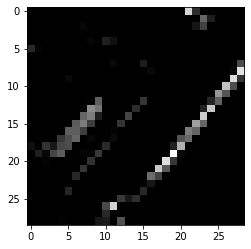

In [ ]:
plt.imshow(y_s1[0,:,:,4],cmap="gray")

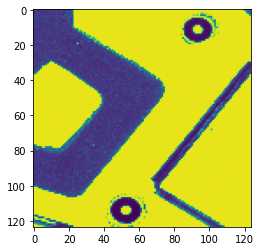

In [ ]:
plt.imshow(sequence[0][0][0])

In [ ]:
model_S2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 124, 124, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 29, 29, 96)        11712     
                                                                 
 batch_normalization (BatchN  (None, 29, 29, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
Total params: 626,752
Trainable params: 626,560
Non-trainab

In [ ]:
model_S1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 124, 124, 1)]     0         
                                                                 
 sequential (Sequential)     (None, 6, 6, 256)         3729472   
                                                                 
Total params: 3,729,472
Trainable params: 3,726,720
Non-trainable params: 2,752
_________________________________________________________________


In [ ]:
y_sample.shape

(5, 6, 6, 256)

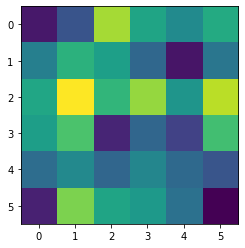

In [ ]:
plt.imshow(y_template[1,:,:,4])

In [ ]:
train.head()

,level_0,index,sample,sample_name,die_iml,die,template,template_name,label
0,0,19835,"[[0.1926525415068744, 0.23742820603255338, 0.1...",AE00427_043414_00_4_1_2001.jpg,"(4, 1)",4,"[[0.17469407250799424, 0.18323845582849838, 0....",AE00449_175923_00_4_1_2001.jpg,0
1,1,318290,"[[0.19071177691899258, 0.20004743875241748, 0....",AE00483_005812_00_4_2_2001.jpg,"(4, 2)",4,"[[0.22272717162499445, 0.21323593276139197, 0....",AE00476_230756_00_4_2_2001.jpg,0
2,2,882167,"[[0.18133543987800135, 0.23041051812203173, 0....",AE00481_015417_00_4_2_2001.jpg,"(4, 2)",4,"[[0.18608411716842305, 0.21005756252871638, 0....",AE00281_155016_00_4_2_2001.jpg,1
3,3,30561,"[[0.24448262003566462, 0.16984758399452332, 0....",AE00408_134022_00_4_1_2001.jpg,"(4, 1)",4,"[[0.17469407250799424, 0.18323845582849838, 0....",AE00449_175923_00_4_1_2001.jpg,0
4,4,31135,"[[0.18658528048349401, 0.206346024231507, 0.19...",AE00547_231449_00_4_1_2001.jpg,"(4, 1)",4,"[[0.1917712342865343, 0.18247880649582215, 0.2...",AE00549_013508_00_4_1_2001.jpg,0
